In [1]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plt.interactive(False)

import os

os.getcwd()

os.chdir(r"C:\Users\humer\Google Drive\Courses\Data Science Course\big data")

In [2]:
#IMPORT DATASET 
data = pd.read_csv("airlines.csv", na_values = 'NA',header=0) 

In [3]:
#VIEW FIRST AND LAST 10 OBSERVATIONS 
data.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [4]:
data.tail(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129870,satisfied,Female,disloyal Customer,70,Personal Travel,Eco,1674,5,4,5,...,5,5,3,2,4,5,4,5,54,46.0
129871,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,...,2,2,4,5,4,4,3,2,9,0.0
129872,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,...,4,4,5,4,4,3,4,4,4,0.0
129873,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,4,...,3,3,5,2,5,3,5,3,7,NaN
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,...,2,2,3,5,3,5,4,2,5,0.0
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [5]:
#USING THE SHAPE ATTRIBUTE TO GET THE NUMBER OF ROWS AND COLUMNS 
data.shape

(129880, 23)

In [6]:
#CHECKING THE COLUMNS DATA TYPES USING THE DTYPES ATTRIBUTE
data.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [7]:
#THE INFO METHOD GIVES THE COLUMNS DATATYPES + NUMBER OF NON-NULL VALUES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [8]:
#SUMMARY STATISTICS OF THE DATA
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


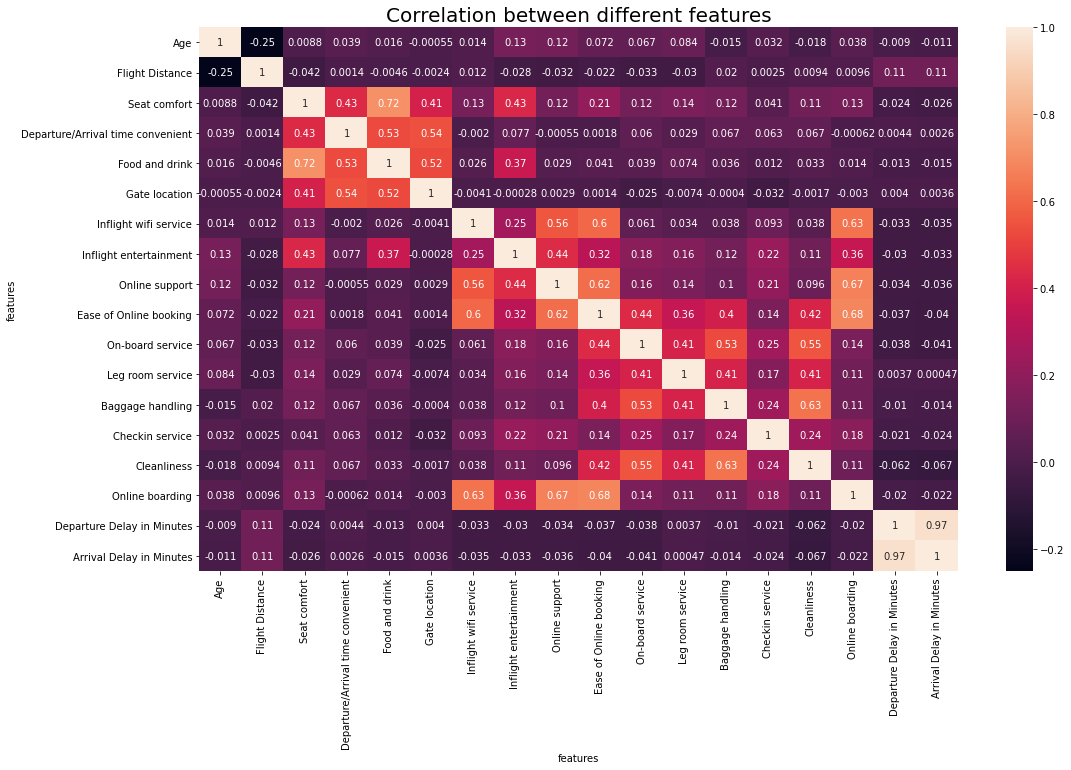

In [9]:
#HEATMAP SHOWING CORRELATION BETWEEN FEATURES
corr=data.corr()
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
sns.heatmap(data.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

In [10]:
#DROPPING OBSERVATIONS WITH MISSING VALUES
data.dropna(inplace=True)

In [11]:
#CHECKING MISSING VALUES
data.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

#OUTLIERS DETECTION AND TREATMENT

In [12]:
#OUTLIERS DETECTION AND TREATMENT
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())


vars = ['Arrival Delay in Minutes','Checkin service','Departure Delay in Minutes', 'Flight Distance','On-board service' ]

for var_name in vars:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.boxplot(x = data[var_name], data = data)

Age                                      0
Arrival Delay in Minutes             17492
Baggage handling                         0
Checkin service                      15323
Class                                    0
Cleanliness                              0
Customer Type                            0
Departure Delay in Minutes           17970
Departure/Arrival time convenient        0
Ease of Online booking                   0
Flight Distance                       2575
Food and drink                           0
Gate location                            0
Gender                                   0
Inflight entertainment                   0
Inflight wifi service                    0
Leg room service                         0
On-board service                     13228
Online boarding                          0
Online support                           0
Seat comfort                             0
Type of Travel                           0
satisfaction                             0
dtype: int6

In [13]:
Q1 = data['Arrival Delay in Minutes'].quantile(0.25)
Q3 = data['Arrival Delay in Minutes'].quantile(0.75)
IQR = Q3 -Q1
print('Q1 of Arrival Delay in Minutes = ', Q1)
print('Q3 of Arrival Delay in Minutes = ', Q3)
print('IQR of Arrival Delay in Minutes = ', IQR)
lower_whisker_Arrival =Q1 -1.5*IQR
upper_whisker_Arrival = Q3 + 1.5*IQR
print('lower_whisker of Arrival Delay in Minutes = ', lower_whisker_Arrival, 'upper_whisker of Arrival Dealy in Minutes = ', upper_whisker_Arrival)

Q1 of Arrival Delay in Minutes =  0.0
Q3 of Arrival Delay in Minutes =  13.0
IQR of Arrival Delay in Minutes =  13.0
lower_whisker of Arrival Delay in Minutes =  -19.5 upper_whisker of Arrival Dealy in Minutes =  32.5


In [14]:
Q1 = data['Checkin service'].quantile(0.25)
Q3 = data['Checkin service'].quantile(0.75)
IQR = Q3 -Q1
print('Q1 of Checkin service = ', Q1)
print('Q3 of Checkin service = ', Q3)
print('IQR of Checkin service = ', IQR)
lower_whisker_Checkin =Q1 -1.5*IQR
upper_whisker_Checkin = Q3 + 1.5*IQR
print('lower_whisker of Checkin = ', lower_whisker_Checkin, 'upper_whisker of Checkin = ', upper_whisker_Checkin)

Q1 of Checkin service =  3.0
Q3 of Checkin service =  4.0
IQR of Checkin service =  1.0
lower_whisker of Checkin =  1.5 upper_whisker of Checkin =  5.5


In [15]:
Q1 = data['Departure Delay in Minutes'].quantile(0.25)
Q3 = data['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3 -Q1
print('Q1 of Departure Delay in Minutes= ', Q1)
print('Q3 of Departure Delay in Minutes = ', Q3)
print('IQR of Departure Delay in Minutes = ', IQR)
lower_whisker_Departure =Q1 -1.5*IQR
upper_whisker_Departure = Q3 + 1.5*IQR
print('lower_whisker of Departure Delay in Minutes = ', lower_whisker_Departure, 'upper_whisker of Departure Delay in Minutes= ', upper_whisker_Departure)

Q1 of Departure Delay in Minutes=  0.0
Q3 of Departure Delay in Minutes =  12.0
IQR of Departure Delay in Minutes =  12.0
lower_whisker of Departure Delay in Minutes =  -18.0 upper_whisker of Departure Delay in Minutes=  30.0


In [16]:
Q1 = data['Flight Distance'].quantile(0.25)
Q3 = data['Flight Distance'].quantile(0.75)
IQR = Q3 -Q1
print('Q1 of Flight Distance= ', Q1)
print('Q3 of Flight Distance = ', Q3)
print('IQR of Flight Distance = ', IQR)
lower_whisker_Distance =Q1 -1.5*IQR
upper_whisker_Distance = Q3 + 1.5*IQR
print('lower_whisker of Flight Distance = ', lower_whisker_Distance, 'upper_whisker of Flight Distance= ', upper_whisker_Distance)

Q1 of Flight Distance=  1359.0
Q3 of Flight Distance =  2543.0
IQR of Flight Distance =  1184.0
lower_whisker of Flight Distance =  -417.0 upper_whisker of Flight Distance=  4319.0


In [17]:
Q1 = data['On-board service'].quantile(0.25)
Q3 = data['On-board service'].quantile(0.75)
IQR = Q3 -Q1
print('Q1 of On-board service= ', Q1)
print('Q3 of On-board service = ', Q3)
print('IQR of On-board service = ', IQR)
lower_whisker_Service =Q1 -1.5*IQR
upper_whisker_Service = Q3 + 1.5*IQR
print('lower_whisker of On-board service = ', lower_whisker_Service, 'upper_whisker of On-board service= ', upper_whisker_Service)

Q1 of On-board service=  3.0
Q3 of On-board service =  4.0
IQR of On-board service =  1.0
lower_whisker of On-board service =  1.5 upper_whisker of On-board service=  5.5


In [18]:
data = data[data['Arrival Delay in Minutes']<upper_whisker_Arrival]
data = data[data['Checkin service']<upper_whisker_Checkin]
data = data[data['Departure Delay in Minutes']<upper_whisker_Departure]
data =data[data['Flight Distance']<upper_whisker_Distance]
data =data[data['On-board service']<upper_whisker_Service]


In [27]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print(((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())


vars = ['Arrival Delay in Minutes','Checkin service','Departure Delay in Minutes', 'Flight Distance','On-board service' ]

for var_name in vars:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.boxplot(x = data[var_name], data = data)

Age                                      0
Arrival Delay in Minutes             14787
Baggage handling                         0
Checkin service                      12317
Class                                    0
Cleanliness                              0
Customer Type                            0
Departure Delay in Minutes           18662
Departure/Arrival time convenient        0
Ease of Online booking                   0
Flight Distance                        220
Food and drink                           0
Gate location                            0
Gender                                   0
Inflight entertainment                   0
Inflight wifi service                    0
Leg room service                         0
On-board service                     10601
Online boarding                          0
Online support                           0
Seat comfort                             0
Type of Travel                           0
satisfaction                             0
dtype: int6

#DATA VISUALIZATION

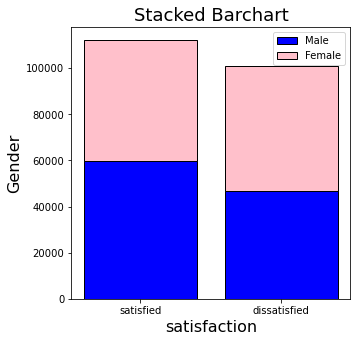

In [22]:
#Stacked Bar Chart with legends:
satisfaction=['satisfied','dissatisfied']
Gender = ['Male','Female']
pos = np.arange(len(satisfaction))
sat=[59855,46676]
gen=[52390 ,54141]
fig = plt.figure(figsize=(5,5))
plt.bar(pos,sat,color='blue',edgecolor='black')

plt.bar(pos,gen,color='pink',edgecolor='black', bottom = sat)

plt.xticks(pos, satisfaction)

plt.xlabel('satisfaction', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.title('Stacked Barchart',fontsize=18)
plt.legend(Gender,loc=1)

plt.show()

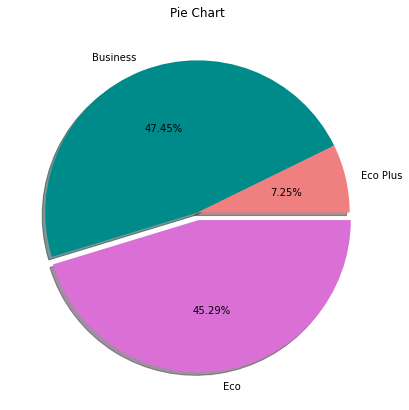

In [23]:
#PIE CHART

class1 = data.loc[data["Class"]=="Eco"].count()[0]

class2 = data.loc[data["Class"]=="Business"].count()[0]

class3 = data.loc[data["Class"]=="Eco Plus"].count()[0]

fig = plt.figure(figsize=(25,7))
labels= ['Eco','Business','Eco Plus']
colors= ['orchid','darkcyan','lightcoral']
exp=(0.05,0,0)

plt.pie([class1,class2,class3],labels=labels,colors=colors,explode=exp,autopct='%1.2f%%',
        counterclock=False, shadow=True)
plt.title("Pie Chart")

plt.show()

<Figure size 360x360 with 0 Axes>

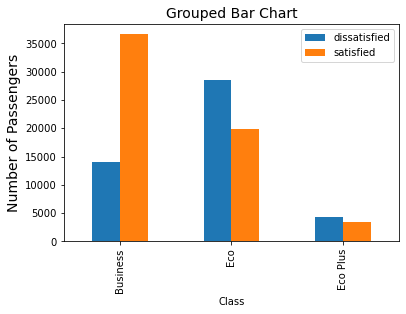

In [24]:
#Grouped Barchart
fig = plt.figure(figsize=(5,5))
pd.crosstab(data.Class, data.satisfaction).plot(kind = 'bar')
plt.title('Grouped Bar Chart', fontsize = 14)
plt.ylabel('Number of Passengers', fontsize = 14 )
plt.legend(loc = 1, fontsize = 10)
plt.show()

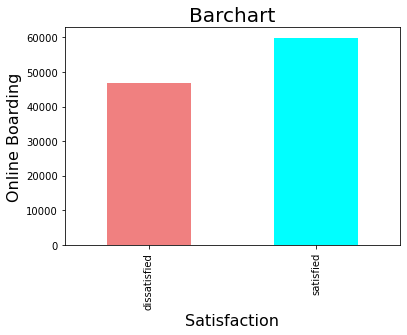

In [25]:
df=data.groupby("satisfaction")["Online boarding"].count().plot(kind = 'bar',color=['lightcoral','aqua'])
plt.xlabel('Satisfaction', fontsize=16)
plt.ylabel('Online Boarding', fontsize=16)
plt.title('Barchart',fontsize=20)
plt.show()


#ENCODING

In [28]:
data.Gender.value_counts()

Female    54141
Male      52390
Name: Gender, dtype: int64

In [30]:
data.Gender = data.Gender.map({ 
                           'Female':0,
                           'Male':1,
                     
})

In [31]:
data['Customer Type'].value_counts()

Loyal Customer       86807
disloyal Customer    19724
Name: Customer Type, dtype: int64

In [32]:
data['Customer Type'] = data['Customer Type'].map({ 
                                            'Loyal Customer':0,
                                            'disloyal Customer':1
 })
                     


In [33]:
data['Type of Travel'].value_counts()

Business travel    73023
Personal Travel    33508
Name: Type of Travel, dtype: int64

In [34]:
data['Type of Travel'] = data['Type of Travel'].map({ 
                                                    'Personal Travel':0,
                                                    'Business travel':1
                                                   })

In [35]:
data.Class.value_counts()

Business    50553
Eco         48253
Eco Plus     7725
Name: Class, dtype: int64

In [36]:
data.Class = data.Class.map({ 
                     'Eco':0,
                     'Business':1,
                     'Eco Plus':2
})

In [37]:
X = data.drop('satisfaction',axis=1)
y = data.satisfaction

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=0,test_size=0.25)


#LOGISTIC REGRESSION

In [39]:
model=LogisticRegression(max_iter=10000,tol=0.001)


In [40]:
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=10000, tol=0.001)

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=10000,tol=0.001),X_train,y_train.values.ravel(),cv=5).mean()

0.8332498716831174

In [45]:
y_pred = model.predict(X_test)

In [46]:
model.score(X_train, y_train)

0.8341510425792886

In [47]:
model.score(X_test, y_test)

0.8336274546615101

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 9461,  2184],
       [ 2247, 12741]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

dissatisfied       0.81      0.81      0.81     11645
   satisfied       0.85      0.85      0.85     14988

    accuracy                           0.83     26633
   macro avg       0.83      0.83      0.83     26633
weighted avg       0.83      0.83      0.83     26633



Logistic Regression Success Rate : 83.36%


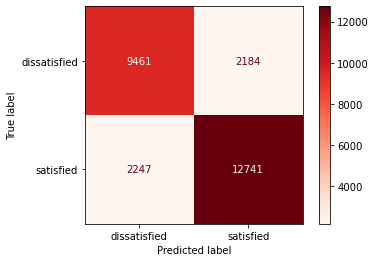

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Success Rate :", "{:.2f}%".format(100 * accuracy))
plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Reds)
plt.show()

#RANDOM FOREST CLASSIFIER

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
params = {'n_estimators':[20,40,60,80,100]}
model = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=4)
model

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [20, 40, 60, 80, 100]})

In [54]:
cross_val_score(RandomForestClassifier(),X_train,y_train.values.ravel(),cv=5).mean()

0.9528774828915394

In [55]:
model.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [20, 40, 60, 80, 100]})

In [56]:
model.best_params_

{'n_estimators': 80}

In [57]:
model.best_score_

0.9524268676939596

In [58]:
model.score(X_train,y_train)

0.9999874840421538

In [59]:
model.score(X_test,y_test)

0.955356137123118

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[11196,   449],
       [  740, 14248]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

dissatisfied       0.94      0.96      0.95     11645
   satisfied       0.97      0.95      0.96     14988

    accuracy                           0.96     26633
   macro avg       0.95      0.96      0.95     26633
weighted avg       0.96      0.96      0.96     26633



Random forest Classifier Success Rate : 95.54%


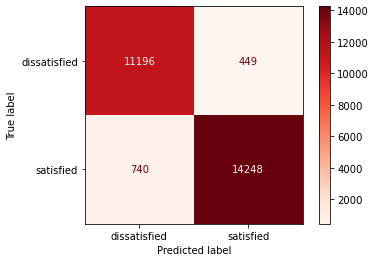

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

print("Random forest Classifier Success Rate :", "{:.2f}%".format(100 * accuracy))
plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Reds)
plt.show()